In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Let's start by checking the number of columns

In [3]:
train.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [3]:
x_full = train.loc[:, train.columns!='Activity']
y_full = train['Activity']

In [18]:
X_train, X_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.33, random_state=0)
print(X_train.shape)
print(X_val.shape)

(2513, 1776)
(1238, 1776)


### Given the large number of features, we need to do some feature selection. We will be using the PCA component analysis to select the features with the highest variance.

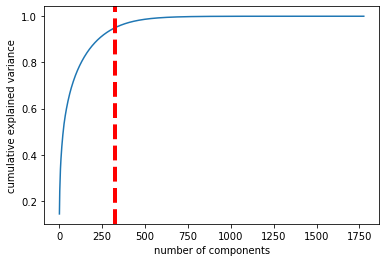

In [6]:
pca_test = PCA(n_components=1776)
pca_test.fit(X_train)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=324, ymin=0, ymax=1)
plt.show()
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [7]:
pca_df.loc[320:350]

,Cumulative Variance Ratio,Explained Variance Ratio
320,0.948749,0.000374
321,0.949123,0.000374
322,0.949493,0.000370
323,0.949863,0.000370
324,0.950228,0.000366
325,0.950594,0.000365
326,0.950956,0.000362
327,0.951316,0.000360
328,0.951673,0.000357
329,0.952026,0.000354


In [8]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

In [13]:
pca.explained_variance_ratio_

array([0.14387693, 0.0663826 , 0.03302261, 0.02823061, 0.02593627,
       0.02116598, 0.01949065, 0.01655481, 0.01428052, 0.01244043,
       0.01196873, 0.01132238, 0.0108703 , 0.01017922, 0.00991212,
       0.00933807, 0.00901088, 0.00855775, 0.0081201 , 0.00809541,
       0.00774316, 0.0074428 , 0.00710347, 0.00697491, 0.00680032,
       0.00658455, 0.00638761, 0.0060224 , 0.00554717, 0.0052605 ,
       0.005162  , 0.00509323, 0.00490613, 0.0048794 , 0.00468357,
       0.00466818, 0.00450201, 0.00439579, 0.00424772, 0.00419609,
       0.00414849, 0.00400061, 0.00394479, 0.00387339, 0.00380391,
       0.0037687 , 0.00370017, 0.00360366, 0.00355669, 0.00352566,
       0.00347176, 0.00339076, 0.003364  , 0.00332104, 0.00324381,
       0.0032152 , 0.0031162 , 0.0030511 , 0.00302294, 0.00298396,
       0.00296632, 0.00292849, 0.00286007, 0.00282958, 0.00278273,
       0.00275864, 0.00272901, 0.00266478, 0.00266039, 0.0025792 ,
       0.00251678, 0.00247767, 0.00246483, 0.00242205, 0.00241

In [14]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [15]:
y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       555
           1       0.77      0.85      0.81       683

    accuracy                           0.78      1238
   macro avg       0.78      0.77      0.77      1238
weighted avg       0.78      0.78      0.78      1238



### We are clearly not going far with this type of model. Let's tune it...

In [4]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [17]:
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [18]:
grid_predictions = grid.predict(X_val)
 
# print classification report
print(classification_report(y_val, grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       555
           1       0.79      0.83      0.81       683

    accuracy                           0.78      1238
   macro avg       0.78      0.78      0.78      1238
weighted avg       0.78      0.78      0.78      1238



### Clearly the model is not fit for this task...

In [5]:
X_full_train, X_test, y_full_train, y_test = train_test_split(
    x_full, y_full, test_size=0.5, random_state=10
)

pca = PCA(n_components=0.95)
X_full_train = pca.fit_transform(X_full_train)

X_train_ensemble, X_train_linear, y_train_ensemble, y_train_linear = train_test_split(
    X_full_train, y_full_train, test_size=0.5, random_state=10
)

In [6]:
n_estimators = 10
max_depth = 3

gradient_boosting = GradientBoostingClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)
_ = gradient_boosting.fit(X_train_ensemble, y_train_ensemble)

In [7]:
from sklearn.preprocessing import FunctionTransformer


def gbdt_apply(X, model):
    return model.apply(X)[:, :, 0]


gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gradient_boosting}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    SVC()
)
gbdt_model.fit(X_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function gbdt_apply at 0x000002A46B3A3820>,
                                     kw_args={'model': GradientBoostingClassifier(n_estimators=10,
                                                                                  random_state=10)})),
                ('svc', SVC())])

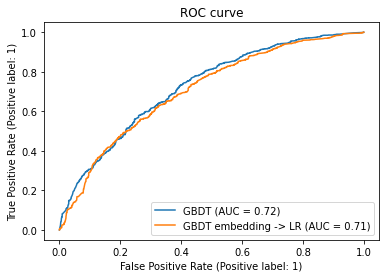

In [8]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("GBDT", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]

X_test = pca.transform(X_test)

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")